<a href="https://colab.research.google.com/github/promckkon/MK-DCNN/blob/main/GA_CWRU_26216.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
import numpy as np
import catboost
import sklearn

print("numpy:", np.__version__)
print("catboost:", catboost.__version__)
print("sklearn:", sklearn.__version__)


numpy: 1.26.4
catboost: 1.2.7
sklearn: 1.6.1


In [110]:
!pip -q uninstall -y catboost
!pip -q install -U "numpy==1.26.4"
!pip -q install --no-cache-dir --force-reinstall "catboost==1.2.7"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 202.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 362.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 311.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 391.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 160.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 157.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 133.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 203.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 118.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 141.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [111]:
import scipy.io
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

Dataset Input

In [112]:
df=pd.DataFrame(columns=['DE_data','fault']) # upload the dataset on googledrive

for root, dirs, files in os.walk("/content/drive/MyDrive/CWRU_with_NOISE/CWRU_2", topdown=False):
    for file_name in files:
        path = os.path.join(root, file_name)
        print(path)

        mat = scipy.io.loadmat(path)

        key_name = list(mat.keys())[3]
        DE_data = mat.get(key_name)
        fault = np.full((len(DE_data), 1), file_name[:-4])

        df_temp = pd.DataFrame({'DE_data':np.ravel(DE_data) , 'fault':np.ravel(fault)})

        df = pd.concat([df,df_temp],axis=0)
        print(df['fault'].unique())

df.to_csv('/content/drive/MyDrive/MK-DCNN CWRU/NOISE_0_faults.csv',index=False)

/content/drive/MyDrive/CWRU_with_NOISE/CWRU_2/F0_Normal.mat
['F0_Normal']
/content/drive/MyDrive/CWRU_with_NOISE/CWRU_2/F1_BallFault_7.mat
['F0_Normal' 'F1_BallFault_7']
/content/drive/MyDrive/CWRU_with_NOISE/CWRU_2/F2_BallFault_14.mat
['F0_Normal' 'F1_BallFault_7' 'F2_BallFault_14']
/content/drive/MyDrive/CWRU_with_NOISE/CWRU_2/F3_BallFault_21.mat
['F0_Normal' 'F1_BallFault_7' 'F2_BallFault_14' 'F3_BallFault_21']
/content/drive/MyDrive/CWRU_with_NOISE/CWRU_2/F4_InnerRaceFault_7.mat
['F0_Normal' 'F1_BallFault_7' 'F2_BallFault_14' 'F3_BallFault_21'
 'F4_InnerRaceFault_7']
/content/drive/MyDrive/CWRU_with_NOISE/CWRU_2/F5_InnerRaceFault_14.mat
['F0_Normal' 'F1_BallFault_7' 'F2_BallFault_14' 'F3_BallFault_21'
 'F4_InnerRaceFault_7' 'F5_InnerRaceFault_14']
/content/drive/MyDrive/CWRU_with_NOISE/CWRU_2/F6_InnerRaceFault_21.mat
['F0_Normal' 'F1_BallFault_7' 'F2_BallFault_14' 'F3_BallFault_21'
 'F4_InnerRaceFault_7' 'F5_InnerRaceFault_14' 'F6_InnerRaceFault_21']
/content/drive/MyDrive/CWRU_wit

# Multi-Kernel Deep 1D-CNN

In [113]:
pip install tensorflow

In [114]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


# Total target rows
TARGET_ROWS = 1800

# Estimate the total number of samples across all fault types
total_samples = sum(len(df[df['fault'] == f]) for f in df['fault'].unique())

# Calculate suitable window size and stride
num_faults = 9
average_samples_per_fault = total_samples / num_faults
approx_windows_per_fault = TARGET_ROWS / num_faults
stride_ratio = 0.8  # Initial stride/window ratio

win_len = int(average_samples_per_fault / approx_windows_per_fault)
stride = int(win_len * stride_ratio)

X=[]
Y=[]


for k in df['fault'].unique():

    df_temp_2 = df[df['fault']==k]

    for i in np.arange(0,len(df_temp_2)-(win_len),stride):
        temp = df_temp_2.iloc[i:i+win_len,:-1].values
        temp = temp.reshape((1,-1))
        X.append(temp)
        Y.append(df_temp_2.iloc[i+win_len,-1])

X=np.array(X)
X=X.reshape((X.shape[0],-1,1))
#X = np.repeat(X, 3, axis=3) # To repeat into 3 chanel format


Y=np.array(Y)
encoder= LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
OHE_Y = to_categorical(encoded_Y)

In [115]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,OHE_Y,test_size=0.3,shuffle=True)

In [116]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv1D, MaxPooling1D, concatenate
from tensorflow.keras import backend as K

# --- Custom Physics-Informed Loss Function ---
def custom_loss(y_true, y_pred):
    # Standard categorical crossentropy
    loss = K.categorical_crossentropy(y_true, y_pred)

    # Physics-Informed Term: penalize rapid class probability changes
    # Ensure y_pred is at least 2D for slicing
    if K.ndim(y_pred) < 2:
        y_pred = K.expand_dims(y_pred, axis=-1)

    # Ensure y_pred has more than one class dimension to compute diff
    if K.int_shape(y_pred)[-1] > 1:
        diff = y_pred[:, 1:] - y_pred[:, :-1]
        squared_diff = tf.square(diff)
        physics_term = tf.reduce_mean(squared_diff)
    else:
        physics_term = 0.0 # No physics term if only one class


    # Total loss = classification loss + regularization term
    total_loss = loss + 0.01 * physics_term  # 0.01 is tunable

    return total_loss

# --- Model Definition ---
# no_classes = len(df['fault'].unique()) # Original line that caused 10 classes
no_classes = len(encoder.classes_) # Use the encoder to get the correct number of classes
print(f"Number of output classes (no_classes): {no_classes}") # Add print statement to verify

input_shape = (X.shape[1], X.shape[2])  # Example: (784, 1)

# Head 1
inputs1 = Input(shape=input_shape)
conv1 = Conv1D(filters=64, kernel_size=200, activation='relu')(inputs1)
drop1 = Dropout(0.5)(conv1)
pool1 = MaxPooling1D(pool_size=20)(drop1)
flat1 = Flatten()(pool1)

# Head 2
inputs2 = Input(shape=input_shape)
conv2 = Conv1D(filters=64, kernel_size=100, activation='relu')(inputs2)
drop2 = Dropout(0.5)(conv2)
pool2 = MaxPooling1D(pool_size=10)(drop2)
flat2 = Flatten()(pool2)

# Head 3
inputs3 = Input(shape=input_shape)
conv3 = Conv1D(filters=64, kernel_size=50, activation='relu')(inputs3)
drop3 = Dropout(0.5)(conv3)
pool3 = MaxPooling1D(pool_size=5)(drop3)
flat3 = Flatten()(pool3)

# Merge all feature paths
merged = concatenate([flat1, flat2, flat3])

# Fully connected interpretation
dense1 = Dense(100, activation='relu')(merged)
outputs = Dense(no_classes, activation='softmax')(dense1)

# Build and compile model with custom loss
cnn_model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
cnn_model.compile(optimizer='adam', loss=custom_loss, metrics=['accuracy'])

# Model summary
cnn_model.summary()

Number of output classes (no_classes): 10


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 2706, 1)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_10      │ (None, 2706, 1)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_11      │ (None, 2706, 1)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_9 (Conv1D)   │ (None, 2507, 64)  │     12,864 │ input_layer_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_10 (Conv1D)  │ (None, 2607, 64)  │      6,464 │ input_layer_10[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_11 (Conv1D)  │ (None, 2657, 64)  │      3,264 │ input_layer_11[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 2507, 64)  │          0 │ conv1d_9[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 2607, 64)  │          0 │ conv1d_10[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 2657, 64)  │          0 │ conv1d_11[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_9     │ (None, 125, 64)   │          0 │ dropout_9[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_10    │ (None, 260, 64)   │          0 │ dropout_10[0][0]  │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_11    │ (None, 531, 64)   │          0 │ dropout_11[0][0]  │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_9 (Flatten) │ (None, 8000)      │          0 │ max_pooling1d_9[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_10          │ (None, 16640)     │          0 │ max_pooling1d_10… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_11          │ (None, 33984)     │          0 │ max_pooling1d_11… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 58624)     │          0 │ flatten_9[0][0],  │
│ (Concatenate)       │                   │            │ flatten_10[0][0], │
│                     │                   │            │ flatten_11[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 100)       │  5,862,500 │ concatenate_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 10)        │      1,010 │ dense_6[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,886,102 (22.45 MB)

 Trainable params: 5,886,102 (22.45 MB)

 Non-trainable params: 0 (0.00 B)

In [117]:
batch_size =100
epochs = 20

# Explicitly convert X_train and X_test to a numeric dtype if they are object dtype
# This addresses the ValueError: Invalid dtype: object
if X_train.dtype == 'object':
    X_train = X_train.astype(np.float32)
if X_test.dtype == 'object':
    X_test = X_test.astype(np.float32)

history = cnn_model.fit([X_train,X_train,X_train], y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=([X_test,X_test,X_test],y_test),shuffle=True)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.1134 - loss: 4.3013 - val_accuracy: 0.3418 - val_loss: 1.9607
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.3328 - loss: 1.8320 - val_accuracy: 0.5275 - val_loss: 1.5504
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.5569 - loss: 1.3287 - val_accuracy: 0.6790 - val_loss: 1.1922
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.6939 - loss: 0.9194 - val_accuracy: 0.7682 - val_loss: 0.8679
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8550 - loss: 0.5666 - val_accuracy: 0.8975 - val_loss: 0.6032
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9385 - loss: 0.3145 - val_accuracy: 0.8871 - val_loss: 0.4752
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9565 - loss: 0.1948 - val_accuracy: 0.9316 - val_loss: 0.3402
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9687 - loss: 0.1292 - val_accuracy: 0.9257 - va

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


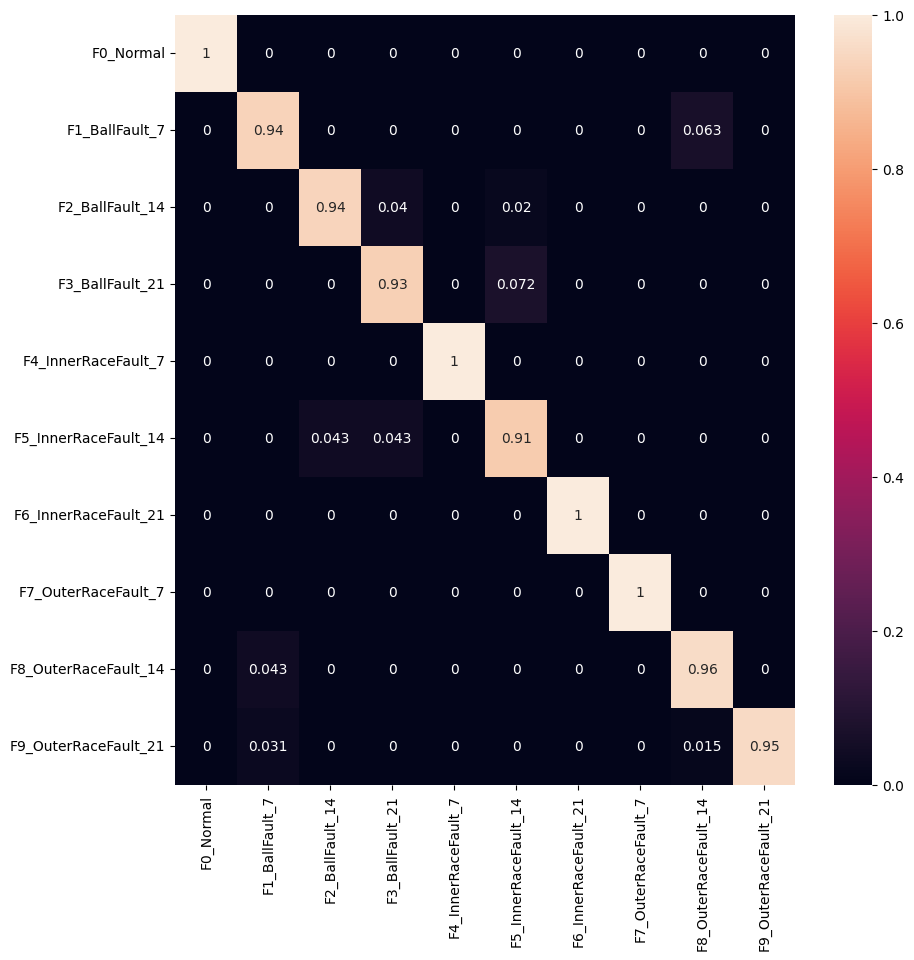

In [118]:
def inv_Transform_result(y_pred):
    y_pred = y_pred.argmax(axis=1)
    y_pred = encoder.inverse_transform(y_pred)
    return y_pred



y_pred=cnn_model.predict([X_test,X_test,X_test])


Y_pred=inv_Transform_result(y_pred)
Y_test = inv_Transform_result(y_test)




from sklearn.metrics import confusion_matrix


plt.figure(figsize=(10,10))
cm = confusion_matrix(Y_test, Y_pred,normalize='true')
f = sns.heatmap(cm, annot=True,xticklabels=encoder.classes_,yticklabels=encoder.classes_)

In [119]:
dummy_cnn = Model(inputs=cnn_model.input,outputs=cnn_model.layers[16].output)
y_viz = dummy_cnn.predict([X_train,X_train,X_train])

50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1570 samples in 0.001s...
[t-SNE] Computed neighbors for 1570 samples in 0.146s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1570
[t-SNE] Computed conditional probabilities for sample 1570 / 1570
[t-SNE] Mean sigma: 2.147107
[t-SNE] Computed conditional probabilities in 0.128s
[t-SNE] Iteration 50: error = 57.1331062, gradient norm = 0.0409565 (50 iterations in 0.879s)
[t-SNE] Iteration 100: error = 52.4659195, gradient norm = 0.0130149 (50 iterations in 0.710s)
[t-SNE] Iteration 150: error = 51.3542213, gradient norm = 0.0088386 (50 iterations in 0.580s)
[t-SNE] Iteration 200: error = 50.8225784, gradient norm = 0.0065427 (50 iterations in 0.447s)
[t-SNE] Iteration 250: error = 50.5030365, gradient norm = 0.0055747 (50 iterations in 0.466s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.503036
[t-SNE] Iteration 300: error = 0.9137108, gradient norm = 0.0163513 (50 iterations in 0.491s

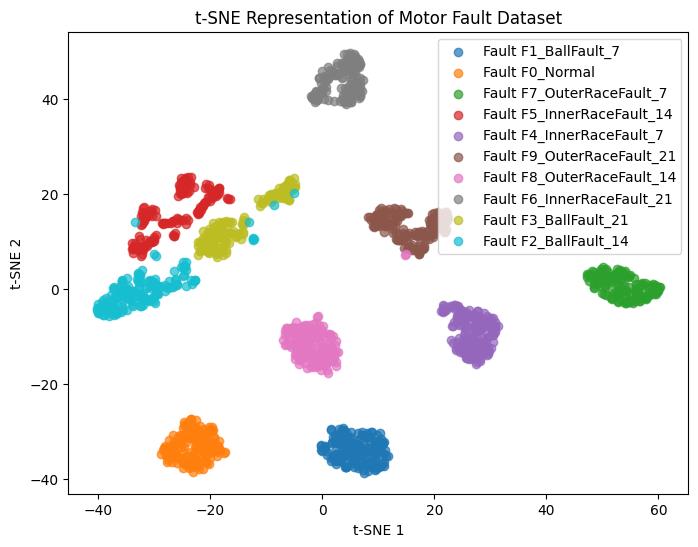

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Apply t-SNE transformation
X_t_sne = TSNE(
    n_components=2,
    learning_rate='auto',
    verbose=2,  # Increase verbosity for more detailed feedback
    perplexity=40
).fit_transform(y_viz)

# Create DataFrame for t-SNE components
tSNEdf = pd.DataFrame(data=X_t_sne, columns=['T-SNE component 1', 'T-SNE component 2'])

# Assuming `inv_Transform_result` transforms `y_train` to get the Fault labels
tSNEdf['Fault'] = inv_Transform_result(y_train)

# Save the t-SNE DataFrame as a CSV file
tSNEdf.to_csv('/content/drive/MyDrive/MK-DCNN CWRU/NNOISE_0_tSNE_results.csv', index=True)
print("t-SNE results saved as '/content/drive/MyDrive/MK-DCNN CWRU/NNOISE_0_tSNE_results.csv'.")

# # Plot the t-SNE results with Fault as hue
# plt.figure(figsize=(12, 12))  # Larger figure for clarity
# sns.scatterplot(
#     x='T-SNE component 1',
#     y='T-SNE component 2',
#     hue='Fault',
#     palette=sns.color_palette("husl", as_cmap=False),  # Vivid color palette
#     data=tSNEdf,
#     legend="full",
#     alpha=0.7,  # Increased transparency for better overlap clarity
#     s=100  # Larger marker size
# )

# # Add gridlines for better visualization
# plt.grid


# Optional: Visualization of t-SNE representation
plt.figure(figsize=(8, 6))
for label in tSNEdf['Fault'].unique():
    subset = tSNEdf[tSNEdf['Fault'] == label]
    plt.scatter(subset['T-SNE component 1'], subset['T-SNE component 2'], label=f'Fault {label}', alpha=0.7)

plt.title('t-SNE Representation of Motor Fault Dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()

Statistical Features

In [121]:
import numpy as np
from scipy.stats import skew, kurtosis
import pandas as pd
import matplotlib.pyplot as plt

# Total target rows
TARGET_ROWS = 1800

# Estimate the total number of samples across all fault types
total_samples = sum(len(df[df['fault'] == f]) for f in df['fault'].unique())

# Calculate suitable window size and stride
num_faults = 9
average_samples_per_fault = total_samples / num_faults
approx_windows_per_fault = TARGET_ROWS / num_faults
stride_ratio = 0.8  # Initial stride/window ratio

WINDOW_SIZE = int(average_samples_per_fault / approx_windows_per_fault)
STRIDE = int(WINDOW_SIZE * stride_ratio)

print(f"Calculated WINDOW_SIZE: {WINDOW_SIZE}, STRIDE: {STRIDE}")

# Initialize a list to store statistical features
statistical_features = []

# Loop through each fault type
for f in df['fault'].unique():
    # Extract data for the current fault type
    # Convert to NumPy array for efficiency and ensure float type
    fault_data = df[df['fault'] == f].iloc[:, 0].values.astype(float)

    # Compute windows using sliding window approach
    num_windows = (len(fault_data) - WINDOW_SIZE) // STRIDE + 1
    for i in range(num_windows):
        start = i * STRIDE
        end = start + WINDOW_SIZE
        window = fault_data[start:end]

        # Compute statistical features for the current window
        mean_val = np.mean(window)
        std_val = np.std(window)
        rms_val = np.sqrt(np.mean(np.square(window)))
        max_val = np.max(window)
        min_val = np.min(window)
        skewness_val = skew(window)
        kurtosis_val = kurtosis(window)

        # Additional statistical features
        mean_abs_val = np.mean(np.abs(window))
        form_factor = rms_val / mean_abs_val if mean_abs_val != 0 else 0
        crest_factor = max_val / rms_val if rms_val != 0 else 0

        # Store the features in a dictionary
        statistical_features.append({
            'fault': f,
            'window': i + 1,
            'mean': mean_val,
            'std': std_val,
            'rms': rms_val,
            'max': max_val,
            'min': min_val,
            'skewness': skewness_val,
            'kurtosis': kurtosis_val,
            'form_factor': form_factor,
            'crest_factor': crest_factor
        })

# Convert statistical features into a DataFrame
stat_features_df = pd.DataFrame(statistical_features)

# Display the extracted features and count of rows
print(f"Extracted {len(stat_features_df)} rows (target: {TARGET_ROWS})")
print(stat_features_df)

# Save the extracted features to a CSV file
output_file = "/content/drive/MyDrive/MK-DCNN CWRU/NNOISE_0_statistical_features_with_form_and_crest_factors.csv"
stat_features_df.to_csv(output_file, index=False)
print(f"Statistical features saved to '{output_file}'.")

Calculated WINDOW_SIZE: 2706, STRIDE: 2164
Extracted 2243 rows (target: 1800)
                     fault  window      mean       std       rms       max  \
0                F0_Normal       1  0.008517  0.064628  0.065187  0.204443   
1                F0_Normal       2  0.009602  0.063451  0.064174  0.204860   
2                F0_Normal       3  0.010599  0.064361  0.065228  0.211327   
3                F0_Normal       4  0.012741  0.064404  0.065652  0.211536   
4                F0_Normal       5  0.012252  0.061830  0.063032  0.186919   
...                    ...     ...       ...       ...       ...       ...   
2238  F9_OuterRaceFault_21     221  0.013152  0.649244  0.649378  4.648259   
2239  F9_OuterRaceFault_21     222  0.012568  0.536755  0.536902  4.377827   
2240  F9_OuterRaceFault_21     223  0.013174  0.685940  0.686067  5.076443   
2241  F9_OuterRaceFault_21     224  0.014050  0.626737  0.626894  3.700912   
2242  F9_OuterRaceFault_21     225  0.011118  0.415185  0.415334

In [122]:
import pandas as pd
from sklearn.utils import resample

# Load your dataset (replace 'your_dataset.csv' with your actual file)
df = pd.read_csv('/content/drive/MyDrive/MK-DCNN CWRU/NNOISE_0_statistical_features_with_form_and_crest_factors.csv')

# Display initial class distribution
print("Initial class distribution:")
print(df['fault'].value_counts())

# Target size for undersampling/resampling
TARGET_ROWS = 1570

# Separate all fault types
fault_classes = df['fault'].value_counts()

# Determine the number of classes
num_classes = len(fault_classes)

# Calculate how many samples to take from each class
samples_per_class = TARGET_ROWS // num_classes

# Initialize a list to store resampled data
resampled_data = []

# Loop over each class to resample them
for fault_class in fault_classes.index:
    class_data = df[df['fault'] == fault_class]
    if len(class_data) > samples_per_class:
        # Undersample
        class_data_resampled = resample(class_data, replace=False, n_samples=samples_per_class, random_state=42)
    else:
        # Upsample
        class_data_resampled = resample(class_data, replace=True, n_samples=samples_per_class, random_state=42)

    resampled_data.append(class_data_resampled)

# Concatenate the resampled data into a single DataFrame
balanced_df = pd.concat(resampled_data)

# Check if we have the exact number of rows
current_rows = len(balanced_df)
print(f"Current rows after equal resampling: {current_rows}")

# If the current rows don't match the target rows, adjust by trimming or adding rows
if current_rows > TARGET_ROWS:
    # Trim extra rows (if more than target)
    balanced_df = balanced_df.head(TARGET_ROWS)
elif current_rows < TARGET_ROWS:
    # Add rows if fewer than target, by sampling from existing data
    remaining_rows = TARGET_ROWS - current_rows
    additional_data = balanced_df.sample(n=remaining_rows, replace=True, random_state=42)
    balanced_df = pd.concat([balanced_df, additional_data])

# Shuffle the final dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display new class distribution
print("New class distribution:")
print(balanced_df['fault'].value_counts())

# Display final row count
print(f"Final row count: {len(balanced_df)}")

# Save the balanced dataset to a CSV file
balanced_df.to_csv("/content/drive/MyDrive/MK-DCNN CWRU/NNOISE_0_balanced_dataset_equal_resampling_exact_1570.csv", index=False)
print("Balanced dataset saved as '/content/drive/MyDrive/MK-DCNN CWRU/NNOISE_0_balanced_dataset_equal_resampling_exact_1570.csv'")


Initial class distribution:
fault
F6_InnerRaceFault_21    226
F5_InnerRaceFault_14    225
F9_OuterRaceFault_21    225
F1_BallFault_7          224
F2_BallFault_14         224
F3_BallFault_21         224
F4_InnerRaceFault_7     224
F7_OuterRaceFault_7     224
F8_OuterRaceFault_14    224
F0_Normal               223
Name: count, dtype: int64
Current rows after equal resampling: 1570
New class distribution:
fault
F0_Normal               157
F4_InnerRaceFault_7     157
F9_OuterRaceFault_21    157
F7_OuterRaceFault_7     157
F3_BallFault_21         157
F1_BallFault_7          157
F6_InnerRaceFault_21    157
F5_InnerRaceFault_14    157
F2_BallFault_14         157
F8_OuterRaceFault_14    157
Name: count, dtype: int64
Final row count: 1570
Balanced dataset saved as '/content/drive/MyDrive/MK-DCNN CWRU/NNOISE_0_balanced_dataset_equal_resampling_exact_1570.csv'


In [123]:
balanced_df.shape

(1570, 11)

In [124]:
balanced_df=balanced_df.sort_values(by='fault')

In [125]:
balanced_df

,fault,window,mean,std,rms,max,min,skewness,kurtosis,form_factor,crest_factor
0,F0_Normal,43,0.009751,0.065139,0.065864,0.212996,-0.215708,-0.274433,-0.045461,1.236035,3.233858
6,F0_Normal,155,0.013568,0.065771,0.067156,0.195681,-0.223844,-0.279285,0.122092,1.254285,2.913841
8,F0_Normal,162,0.015803,0.063472,0.065410,0.194847,-0.242828,-0.274544,0.086196,1.240071,2.978856
18,F0_Normal,99,0.014886,0.062857,0.064595,0.204860,-0.170856,-0.033985,-0.097417,1.253608,3.171445
21,F0_Normal,7,0.010991,0.066608,0.067509,0.200062,-0.211536,-0.133130,-0.153008,1.242956,2.963481
...,...,...,...,...,...,...,...,...,...,...,...
1541,F9_OuterRaceFault_21,40,0.013484,0.737223,0.737346,6.864299,-6.411909,-0.367552,29.540443,2.335402,9.309467
1546,F9_OuterRaceFault_21,136,0.014911,0.520936,0.521149,3.901232,-4.596509,-1.108043,23.892289,2.017932,7.485829
1550,F9_OuterRaceFault_21,105,0.014970,0.688700,0.688863,5.321835,-4.927037,0.042281,15.130786,1.892572,7.725534
1559,F9_OuterRaceFault_21,61,0.015927,0.570544,0.570766,4.381165,-5.046395,-0.733240,24.006356,2.147246,7.675934


     t-SNE 1    t-SNE 2      fault
0  21.031197 -26.785013  F0_Normal
1  34.740330  26.228348  F0_Normal
2  37.951035  26.610281  F0_Normal
3  38.448036   0.840126  F0_Normal
4  21.977888 -22.980743  F0_Normal


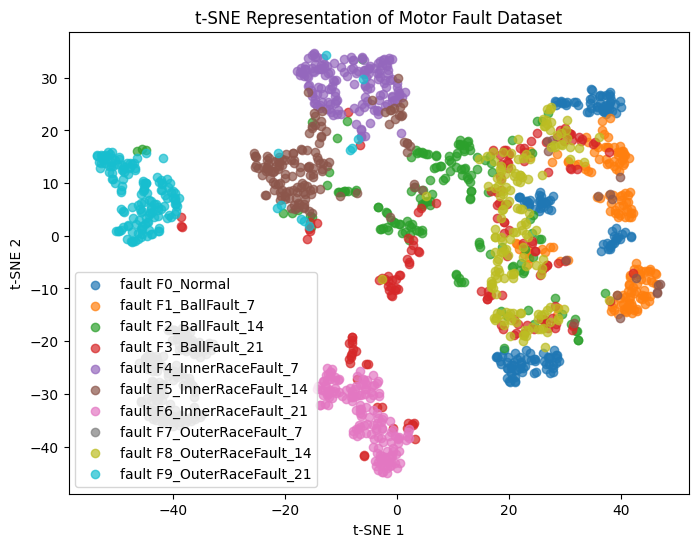

In [126]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


# Sort the dataset by the 'Fault' column
balanced_df = balanced_df.sort_values(by='fault')

# Separate features and target variable
X = balanced_df.drop(columns=['fault'])  # Replace 'Fault' with actual target column name
y = balanced_df['fault']

# Normalize the feature columns using StandardScaler
scaler = StandardScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Concatenate the normalized features with the target variable
STAT_Motor_Fault_dataset_normalized = pd.concat([X_normalized, y.reset_index(drop=True)], axis=1)

# Sort the normalized dataset by 'Fault' column
STAT_Motor_Fault_dataset_normalized = STAT_Motor_Fault_dataset_normalized.sort_values(by='fault')

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)  # 2D t-SNE
X_tsne = tsne.fit_transform(X_normalized)

# Create a DataFrame for t-SNE results
tSNE_representation = pd.DataFrame(X_tsne, columns=['t-SNE 1', 't-SNE 2'])
tSNE_representation['fault'] = y.reset_index(drop=True)

# Display the t-SNE representation
print(tSNE_representation.head())

# Optional: Visualization of t-SNE representation
plt.figure(figsize=(8, 6))
for label in tSNE_representation['fault'].unique():
    subset = tSNE_representation[tSNE_representation['fault'] == label]
    plt.scatter(subset['t-SNE 1'], subset['t-SNE 2'], label=f'fault {label}', alpha=0.7)

plt.title('t-SNE Representation of Motor Fault Dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()


In [127]:
tSNE_representation

,t-SNE 1,t-SNE 2,fault
0,21.031197,-26.785013,F0_Normal
1,34.740330,26.228348,F0_Normal
2,37.951035,26.610281,F0_Normal
3,38.448036,0.840126,F0_Normal
4,21.977888,-22.980743,F0_Normal
...,...,...,...
1565,-50.055351,0.853963,F9_OuterRaceFault_21
1566,-51.590691,15.988619,F9_OuterRaceFault_21
1567,-45.518002,1.767906,F9_OuterRaceFault_21
1568,-52.810356,13.788234,F9_OuterRaceFault_21


In [128]:
tSNE_representation=tSNE_representation.drop(columns=['fault'])
tSNE_representation

,t-SNE 1,t-SNE 2
0,21.031197,-26.785013
1,34.740330,26.228348
2,37.951035,26.610281
3,38.448036,0.840126
4,21.977888,-22.980743
...,...,...
1565,-50.055351,0.853963
1566,-51.590691,15.988619
1567,-45.518002,1.767906
1568,-52.810356,13.788234


In [129]:
tSNEdf = tSNEdf.sort_values(by='Fault')

In [130]:
tSNEdf

,T-SNE component 1,T-SNE component 2,Fault
1,-21.343407,-37.835663,F0_Normal
10,-22.457018,-31.288614,F0_Normal
22,-19.505030,-29.645830,F0_Normal
25,-24.416082,-32.190250,F0_Normal
33,-20.629702,-34.420933,F0_Normal
...,...,...,...
1541,21.393211,14.253205,F9_OuterRaceFault_21
1542,17.224583,11.937390,F9_OuterRaceFault_21
1549,13.296593,14.349551,F9_OuterRaceFault_21
1565,11.349524,13.135940,F9_OuterRaceFault_21


Combined Features

In [131]:
# import pandas as pd

# Assuming df1 and df2 are your two dataframes
# Concatenate the dataframes vertically
Motor_Fault_dataset = pd.concat([tSNE_representation, tSNEdf], axis=1)
Motor_Fault_dataset=Motor_Fault_dataset.sort_values(by='Fault')
Motor_Fault_dataset

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df1 and df2 are your two dataframes
# Concatenate the dataframes vertically
Motor_Fault_dataset = pd.concat([tSNE_representation, tSNEdf], axis=1)

# Sort the dataset by 'Fault' column
Motor_Fault_dataset = Motor_Fault_dataset.sort_values(by='Fault')
Motor_Fault_dataset


,t-SNE 1,t-SNE 2,T-SNE component 1,T-SNE component 2,Fault
1,34.740330,26.228348,-21.343407,-37.835663,F0_Normal
10,22.641304,6.493618,-22.457018,-31.288614,F0_Normal
22,36.203953,26.647011,-19.505030,-29.645830,F0_Normal
25,27.784681,-24.574976,-24.416082,-32.190250,F0_Normal
33,25.710314,7.606060,-20.629702,-34.420933,F0_Normal
...,...,...,...,...,...
1541,-20.625359,5.768806,21.393211,14.253205,F9_OuterRaceFault_21
1542,-41.825325,14.768399,17.224583,11.937390,F9_OuterRaceFault_21
1549,-49.100082,9.510468,13.296593,14.349551,F9_OuterRaceFault_21
1565,-50.055351,0.853963,11.349524,13.135940,F9_OuterRaceFault_21


In [132]:
#Classification Report for MKDCNN

HSPSO-CatBoost


In [133]:
X = Motor_Fault_dataset.iloc[:, 0:4].values
y = Motor_Fault_dataset.iloc[:, 4].values

In [134]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical labels to numerical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.2, random_state=42)

Deployment:

Tuning Duration: 0:00:05.052236
Best Val Accuracy: 1.0
Best Parameters: {'iterations': 50, 'depth': 7, 'learning_rate': 0.08, 'l2_leaf_reg': 3.0, 'bagging_temperature': 1.0, 'random_strength': 1.5}
0:	learn: 1.8756841	test: 1.8714828	best: 1.8714828 (0)	total: 13.4ms	remaining: 13.4s
50:	learn: 0.1162186	test: 0.1043298	best: 0.1043298 (50)	total: 851ms	remaining: 15.8s
100:	learn: 0.0532036	test: 0.0493619	best: 0.0493619 (100)	total: 1.96s	remaining: 17.5s
150:	learn: 0.0299015	test: 0.0317056	best: 0.0317056 (150)	total: 3.13s	remaining: 17.6s
200:	learn: 0.0217226	test: 0.0276382	best: 0.0276382 (200)	total: 4.09s	remaining: 16.3s
250:	learn: 0.0159299	test: 0.0241279	best: 0.0241279 (250)	total: 4.7s	remaining: 14s
300:	learn: 0.0127767	test: 0.0227989	best: 0.0227724 (293)	total: 5.33s	remaining: 12.4s
350:	learn: 0.0105951	test: 0.0219145	best: 0.0218880 (343)	total: 5.93s	remaining: 11s
400:	learn: 0.0088803	test: 0.0209598	best: 0.0209598 (400)	total: 6.57s	remaining: 9.82s
45

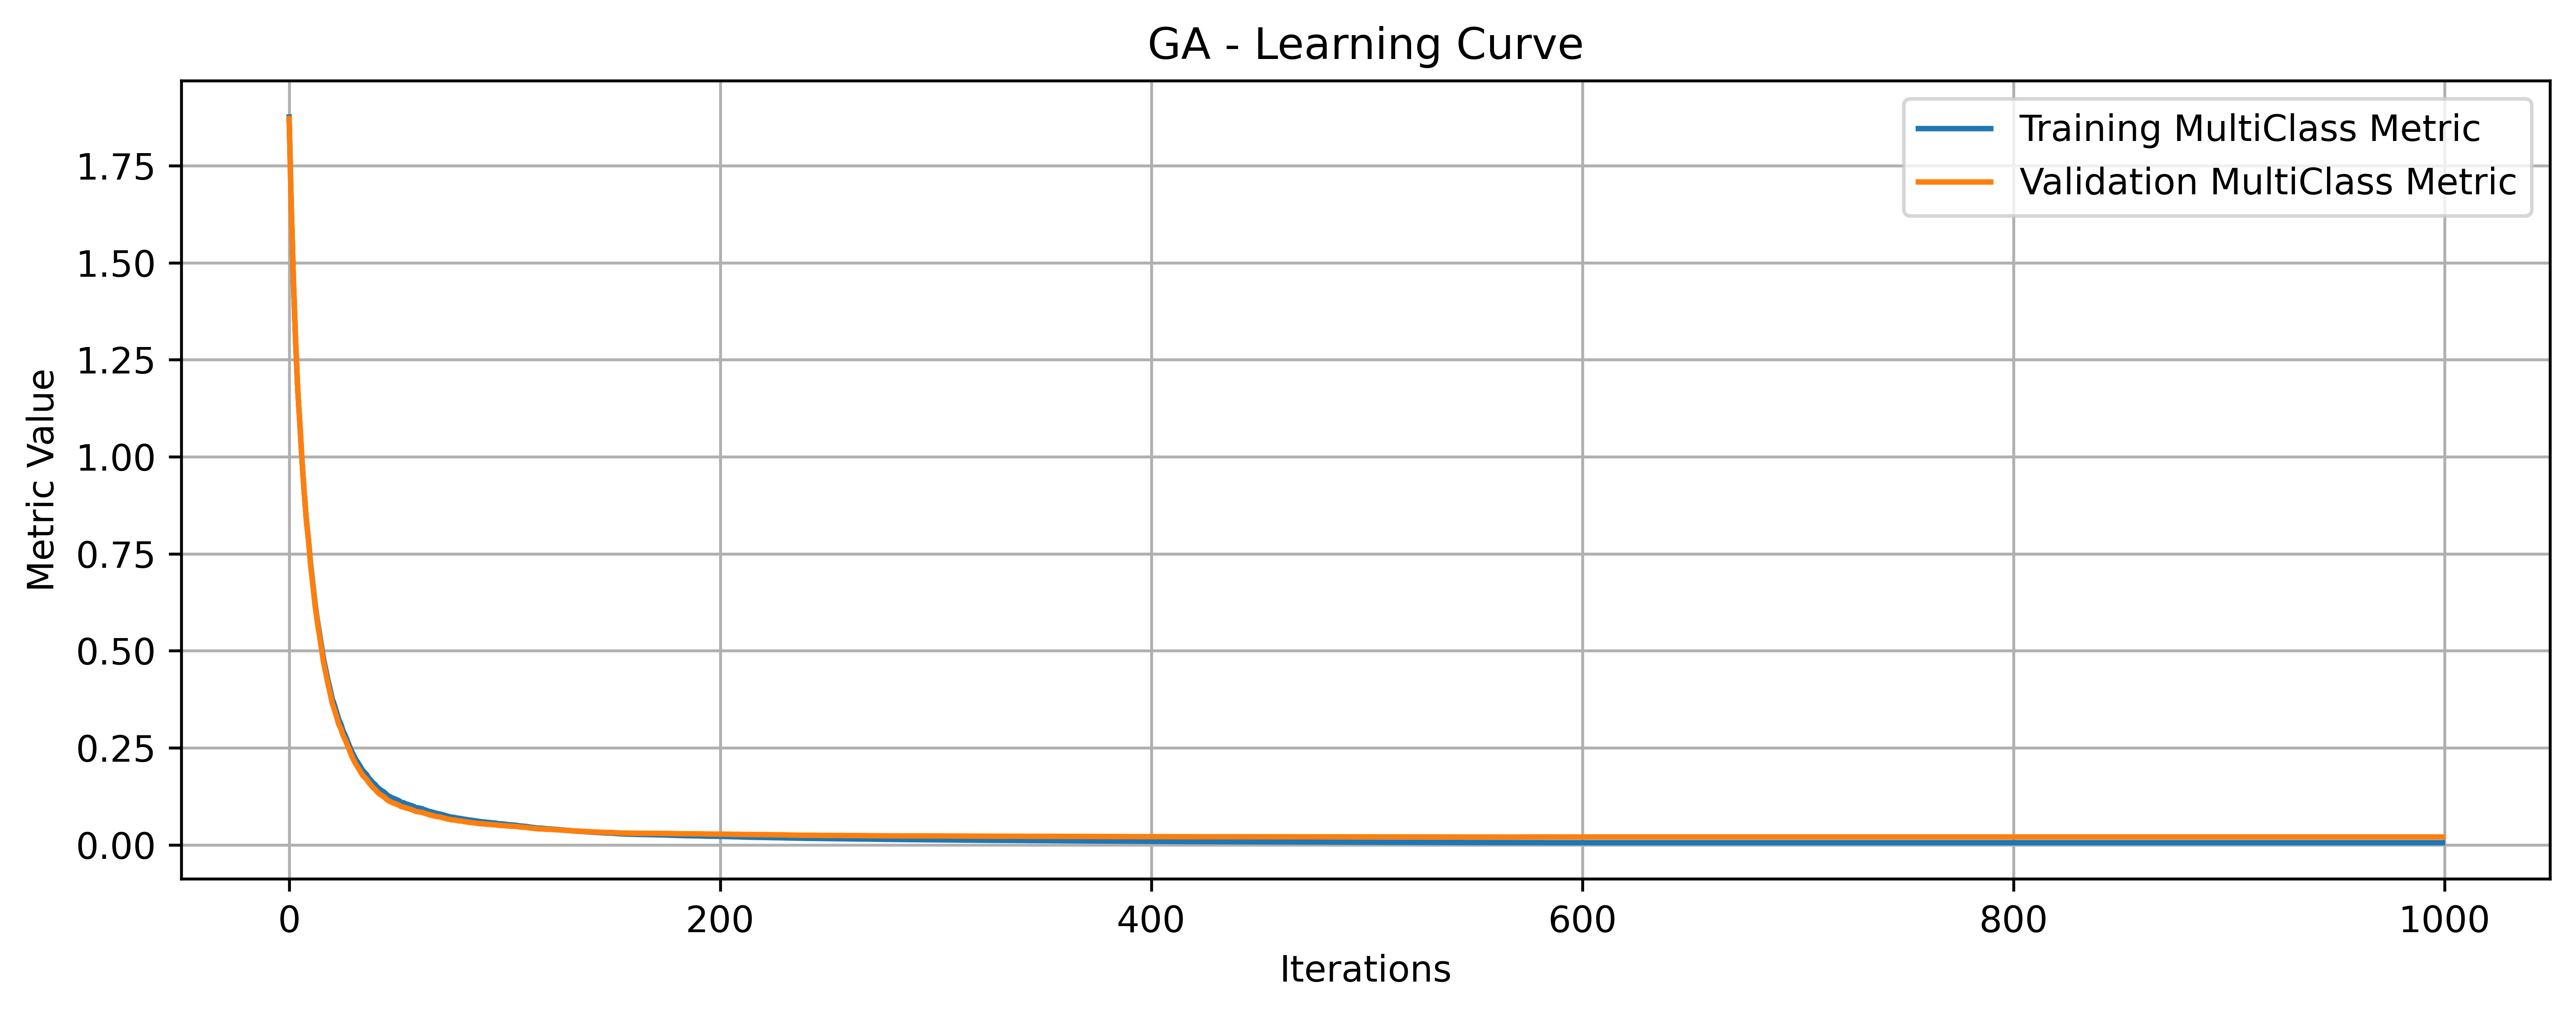

[Saved] /content/drive/MyDrive/GA_metric_curve_1000.png
Classification Report - Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       126
           2       1.00      1.00      1.00       135
           3       1.00      1.00      1.00       121
           4       1.00      1.00      1.00       133
           5       1.00      1.00      1.00       127
           6       1.00      1.00      1.00       111
           7       1.00      1.00      1.00       117
           8       1.00      1.00      1.00       126
           9       1.00      1.00      1.00       128

    accuracy                           1.00      1256
   macro avg       1.00      1.00      1.00      1256
weighted avg       1.00      1.00      1.00      1256

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
    

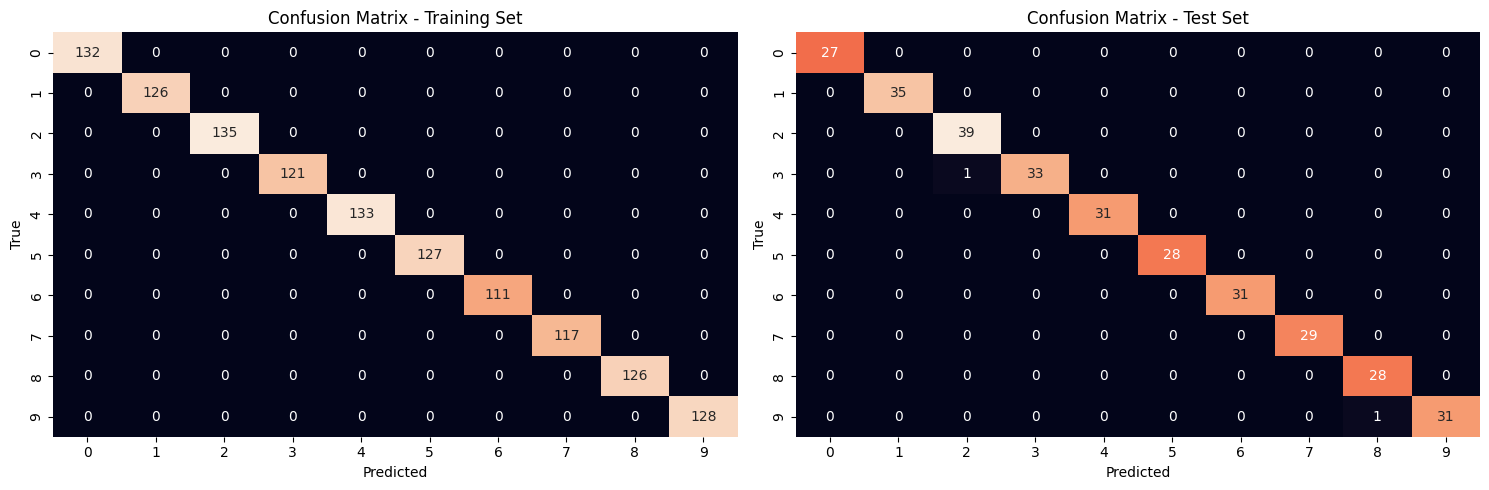

[Saved] /content/drive/MyDrive/GA_C-Matrix.png


In [135]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from catboost import CatBoostClassifier, Pool


# =========================
# Utils
# =========================
def _ensure_1d(y):
    y = np.array(y)
    return y.reshape(-1)


# =========================
# Data to numpy
# =========================
X_train_np = np.array(X_train)
X_test_np  = np.array(X_test)
y_train_np = _ensure_1d(y_train)
y_test_np  = _ensure_1d(y_test)

classes = np.unique(y_train_np)
LOSS_FUNCTION = "Logloss" if len(classes) <= 2 else "MultiClass"

# Train/Val split for GA objective
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
tr_idx, va_idx = next(sss.split(X_train_np, y_train_np))
X_tr, y_tr = X_train_np[tr_idx], y_train_np[tr_idx]
X_va, y_va = X_train_np[va_idx], y_train_np[va_idx]


# =========================
# Search Space (same style as yours)
# =========================
search_space = {
    "iterations": list(range(50, 201, 25)),
    "depth": list(range(2, 9)),
    "learning_rate": [0.03, 0.05, 0.08, 0.1],
    "l2_leaf_reg": [1.0, 3.0, 5.0],
    "bagging_temperature": [0.5, 1.0, 1.5],
    "random_strength": [0.5, 1.0, 1.5],
}
keys = list(search_space.keys())


def random_individual(rng):
    return {k: rng.choice(search_space[k]) for k in keys}


def objective_fast(params, seed=42):
    model = CatBoostClassifier(
        iterations=int(params["iterations"]),
        depth=int(params["depth"]),
        learning_rate=float(params["learning_rate"]),
        l2_leaf_reg=float(params["l2_leaf_reg"]),
        bagging_temperature=float(params["bagging_temperature"]),
        random_strength=float(params["random_strength"]),
        loss_function=LOSS_FUNCTION,
        eval_metric="Accuracy",
        od_type="Iter",
        od_wait=20,
        verbose=False,
        random_seed=seed,
        thread_count=-1
    )
    model.fit(X_tr, y_tr, eval_set=(X_va, y_va), use_best_model=True)
    pred = model.predict(X_va).reshape(-1)
    return float(accuracy_score(y_va, pred))


# =========================
# GA operators
# =========================
def tournament_select(pop, fitness, rng, k=3):
    """pick best among k random individuals"""
    idx = rng.choice(len(pop), size=k, replace=False)
    best = idx[np.argmax([fitness[i] for i in idx])]
    return pop[best]

def uniform_crossover(parent1, parent2, rng, p_swap=0.5):
    """for each gene, swap with probability p_swap"""
    c1 = dict(parent1)
    c2 = dict(parent2)
    for k in keys:
        if rng.random() < p_swap:
            c1[k], c2[k] = c2[k], c1[k]
    return c1, c2

def mutate(ind, rng, p_mut=0.2):
    """for each gene, with p_mut replace by random choice"""
    out = dict(ind)
    for k in keys:
        if rng.random() < p_mut:
            out[k] = rng.choice(search_space[k])
    return out


# =========================
# Genetic Algorithm optimizer
# =========================
def ga_optimize_fast(
    pop_size=12,
    generations=20,      # ✅ 15~30
    seed=42,
    elite=2,
    tournament_k=3,
    crossover_rate=0.9,
    p_swap=0.5,
    mutation_rate=0.2,
    early_stop_acc=0.999
):
    rng = np.random.default_rng(seed)

    # init population
    pop = [random_individual(rng) for _ in range(pop_size)]
    fit = [objective_fast(ind, seed=seed) for ind in pop]

    best_idx = int(np.argmax(fit))
    best_ind = dict(pop[best_idx])
    best_fit = float(fit[best_idx])

    for gen in range(1, generations + 1):
        if best_fit >= early_stop_acc:
            break

        # elitism: keep top 'elite'
        elite_idx = np.argsort(fit)[-elite:]
        new_pop = [dict(pop[i]) for i in elite_idx]

        # create offspring
        while len(new_pop) < pop_size:
            p1 = tournament_select(pop, fit, rng, k=tournament_k)
            p2 = tournament_select(pop, fit, rng, k=tournament_k)

            if rng.random() < crossover_rate:
                c1, c2 = uniform_crossover(p1, p2, rng, p_swap=p_swap)
            else:
                c1, c2 = dict(p1), dict(p2)

            c1 = mutate(c1, rng, p_mut=mutation_rate)
            if len(new_pop) < pop_size:
                new_pop.append(c1)

            if len(new_pop) < pop_size:
                c2 = mutate(c2, rng, p_mut=mutation_rate)
                new_pop.append(c2)

        pop = new_pop[:pop_size]
        fit = [objective_fast(ind, seed=seed) for ind in pop]

        gen_best_idx = int(np.argmax(fit))
        if fit[gen_best_idx] > best_fit:
            best_fit = float(fit[gen_best_idx])
            best_ind = dict(pop[gen_best_idx])

        print(f"Gen {gen:02d} | Best Val Acc: {best_fit:.6f}")

    return best_ind, best_fit


# =========================
# Run GA tuning
# =========================
start_time = datetime.now()
best_params, best_val_acc = ga_optimize_fast(
    pop_size=12,
    generations=20,    # ✅ 你要 15~30 改這裡
    seed=42,
    elite=2,
    tournament_k=3,
    crossover_rate=0.9,
    mutation_rate=0.2
)
end_time = datetime.now()

print("Tuning Duration:", end_time - start_time)
print("Best Val Accuracy:", best_val_acc)
print("Best Parameters:", best_params)


# =========================
# Final model: 1000 iterations + Metric Value Curve
# =========================
final_iterations = 1000
eval_metric_curve = "Logloss" if len(classes) <= 2 else "MultiClass"

train_pool = Pool(X_train_np, y_train_np)
test_pool  = Pool(X_test_np,  y_test_np)

final_model = CatBoostClassifier(
    iterations=final_iterations,
    depth=int(best_params["depth"]),
    learning_rate=float(best_params["learning_rate"]),
    l2_leaf_reg=float(best_params["l2_leaf_reg"]),
    bagging_temperature=float(best_params["bagging_temperature"]),
    random_strength=float(best_params["random_strength"]),
    loss_function=LOSS_FUNCTION,
    eval_metric=eval_metric_curve,
    od_type="Iter",
    od_wait=40,
    verbose=50,
    random_seed=42,
    thread_count=-1
)

# ✅ 跑滿 1000
final_model.fit(train_pool, eval_set=test_pool, use_best_model=False)

curve = final_model.get_evals_result()
train_metric = curve.get("learn", {}).get(eval_metric_curve, [])
val_metric   = curve.get("validation", {}).get(eval_metric_curve, [])

def pad_to_L(arr, L):
    arr = np.array(arr, dtype=float)
    if len(arr) == 0:
        return np.zeros(L, dtype=float)
    if len(arr) < L:
        arr = np.r_[arr, np.full(L - len(arr), arr[-1])]
    return arr[:L]

train_metric = pad_to_L(train_metric, final_iterations)
val_metric   = pad_to_L(val_metric, final_iterations)
x = np.arange(final_iterations)

# Save CSV to Drive
df_curve = pd.DataFrame({
    "Iteration": x,
    f"Train_{eval_metric_curve}": train_metric,
    f"Val_{eval_metric_curve}": val_metric
})
csv_path = "/content/drive/MyDrive/GA_metric_curve_1000.csv"
df_curve.to_csv(csv_path, index=False)
print("[Saved]", csv_path)

# Save PNG to Drive
plt.figure(figsize=(10,4), dpi=600)
plt.plot(x, train_metric, label=f"Training {eval_metric_curve} Metric")
plt.plot(x, val_metric,   label=f"Validation {eval_metric_curve} Metric")
plt.xlabel("Iterations")
plt.ylabel("Metric Value")
plt.title("GA - Learning Curve")
plt.grid(True)
plt.legend()
plt.tight_layout()

png_path = "/content/drive/MyDrive/GA_metric_curve_1000.png"
plt.savefig(png_path, dpi=600, bbox_inches="tight")
plt.show()
print("[Saved]", png_path)

# Reports + Confusion Matrix (save to Drive)
y_pred_train = final_model.predict(X_train_np).reshape(-1)
y_pred_test  = final_model.predict(X_test_np).reshape(-1)

print("Classification Report - Training Set:")
print(classification_report(y_train_np, y_pred_train))
print("Classification Report - Test Set:")
print(classification_report(y_test_np, y_pred_test))

cm_train = confusion_matrix(y_train_np, y_pred_train)
cm_test  = confusion_matrix(y_test_np,  y_pred_test)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.heatmap(cm_train, annot=True, fmt="d", cbar=False)
plt.title("Confusion Matrix - Training Set")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.subplot(1,2,2)
sns.heatmap(cm_test, annot=True, fmt="d", cbar=False)
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.tight_layout()
cm_path = "/content/drive/MyDrive/GA_C-Matrix.png"
plt.savefig(cm_path, dpi=600, bbox_inches="tight")
plt.show()
print("[Saved]", cm_path)


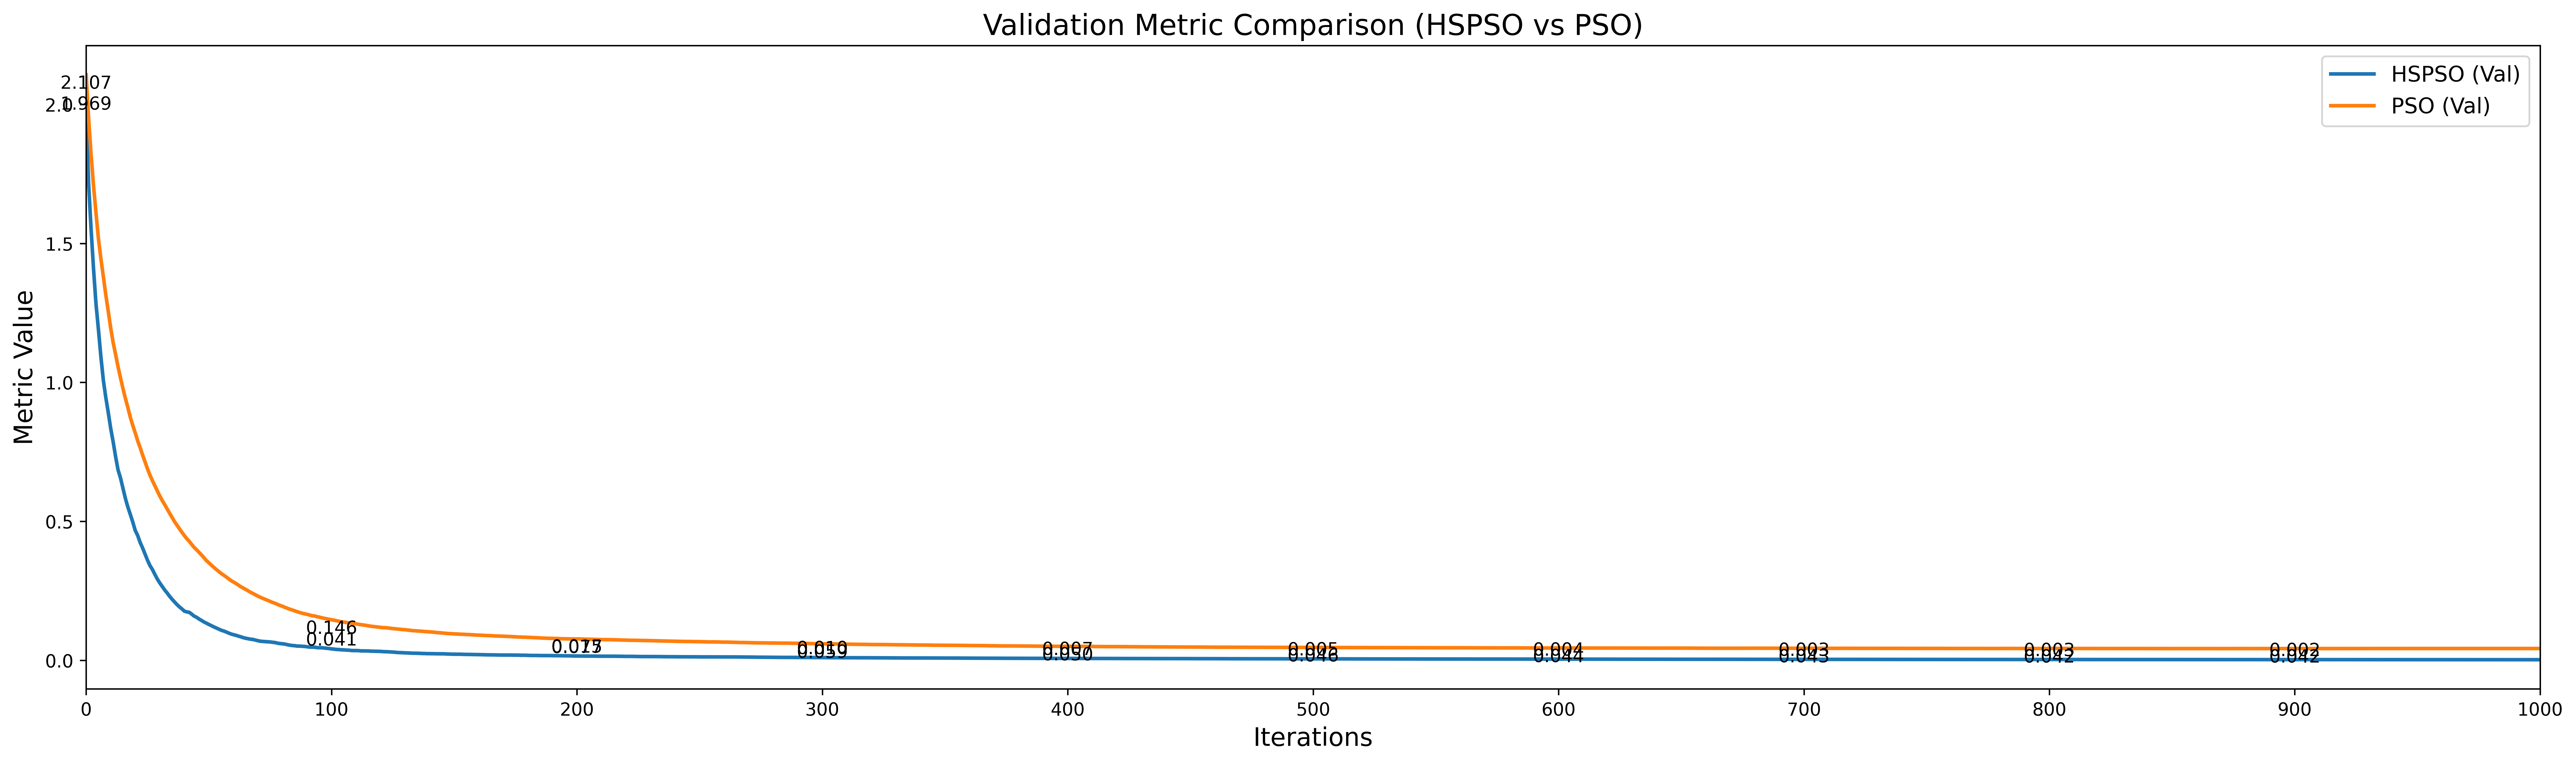

[Saved] /content/drive/MyDrive/PSO_vs_HSPSO_val_curve_clean.png


In [136]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ===== Drive 檔案路徑 =====
hspso_path = "/content/drive/MyDrive/HSPSO_metric_curve_1000.csv"
pso_path   = "/content/drive/MyDrive/PSO_metric_curve_1000.csv"

# ===== 檢查檔案 =====
for p in [hspso_path, pso_path]:
    if not os.path.exists(p):
        raise FileNotFoundError(f"找不到檔案：{p}")

df_h = pd.read_csv(hspso_path)
df_p = pd.read_csv(pso_path)

val_h_col = [c for c in df_h.columns if c.startswith("Val_")][0]
val_p_col = [c for c in df_p.columns if c.startswith("Val_")][0]

L = int(min(len(df_h), len(df_p), 1000))
x = df_h["Iteration"].values[:L]
y_h = df_h[val_h_col].values[:L]
y_p = df_p[val_p_col].values[:L]

# ===== 畫圖 =====
plt.figure(figsize=(20,6), dpi=600)

plt.plot(x, y_h, linewidth=2, label="HSPSO (Val)")
plt.plot(x, y_p, linewidth=2, label="PSO (Val)")

plt.xlabel("Iterations", fontsize=14)
plt.ylabel("Metric Value", fontsize=14)
plt.title("Validation Metric Comparison (HSPSO vs PSO)", fontsize=16)

# ❌ 不要格線
# plt.grid(False)

# ===== X 軸每 100 一個刻度 =====
plt.xticks(np.arange(0, 1001, 100))

# ===== 每 100 iteration 標一次值 =====
for i in range(0, L, 100):
    plt.text(x[i], y_h[i], f"{y_h[i]:.3f}", fontsize=10, va="bottom", ha="center")
    plt.text(x[i], y_p[i], f"{y_p[i]:.3f}", fontsize=10, va="top", ha="center")

plt.xlim(0, 1000)
plt.legend(fontsize=12)
plt.tight_layout()

# ===== 存檔 =====
out_path = "/content/drive/MyDrive/PSO_vs_HSPSO_val_curve_clean.png"
plt.savefig(out_path, dpi=600, bbox_inches="tight")
plt.show()

print("[Saved]", out_path)





In [137]:
learning_curve = final_model.get_evals_result()
print(learning_curve)

{'learn': {'MultiClass': [1.8756841285816388, 1.6457207694313436, 1.4521247601385106, 1.2982601570549455, 1.1721252737204493, 1.0830038211435487, 0.9874398413422818, 0.9074059409846672, 0.8374396253027565, 0.7857352793666168, 0.7232053964495138, 0.6731967162912582, 0.624200547410305, 0.5825863914614917, 0.5490514916742426, 0.5133653089148941, 0.478225252230542, 0.45200957676919606, 0.42502961758182567, 0.4023092800767791, 0.3761892481462382, 0.36100136269368704, 0.34252657264880326, 0.32352443299906386, 0.311551857342198, 0.2940381282043714, 0.28280488657796976, 0.26809023133339727, 0.2546479609797136, 0.24116762818372056, 0.23017712255502945, 0.21946798724484548, 0.2112316509976016, 0.20201742191982533, 0.19276869994999057, 0.1866175408309884, 0.18061820417745836, 0.17179643019068694, 0.16583001498798985, 0.15944286808348856, 0.1548991623827956, 0.14792206162631316, 0.1434133483105407, 0.13946193325489403, 0.13624532130329783, 0.13101014068734276, 0.12643514541668127, 0.12344277604096

In [138]:
# Retrieve evaluation results
learning_curve = final_model.get_evals_result()

# Extract the metric values
# Assuming 'learn' corresponds to the training dataset
train_metric_values = learning_curve.get('learn', {}).get('MultiClass', [])

# Check the extracted values
if train_metric_values:
    print("Training metric values:", train_metric_values)
else:
    print("Metric 'MultiClass' not found in evaluation results.")


Training metric values: [1.8756841285816388, 1.6457207694313436, 1.4521247601385106, 1.2982601570549455, 1.1721252737204493, 1.0830038211435487, 0.9874398413422818, 0.9074059409846672, 0.8374396253027565, 0.7857352793666168, 0.7232053964495138, 0.6731967162912582, 0.624200547410305, 0.5825863914614917, 0.5490514916742426, 0.5133653089148941, 0.478225252230542, 0.45200957676919606, 0.42502961758182567, 0.4023092800767791, 0.3761892481462382, 0.36100136269368704, 0.34252657264880326, 0.32352443299906386, 0.311551857342198, 0.2940381282043714, 0.28280488657796976, 0.26809023133339727, 0.2546479609797136, 0.24116762818372056, 0.23017712255502945, 0.21946798724484548, 0.2112316509976016, 0.20201742191982533, 0.19276869994999057, 0.1866175408309884, 0.18061820417745836, 0.17179643019068694, 0.16583001498798985, 0.15944286808348856, 0.1548991623827956, 0.14792206162631316, 0.1434133483105407, 0.13946193325489403, 0.13624532130329783, 0.13101014068734276, 0.12643514541668127, 0.123442776040963

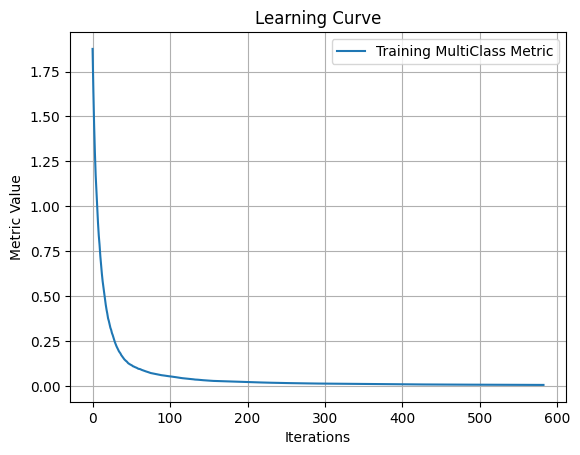

In [139]:
import matplotlib.pyplot as plt

# Plotting the learning curve
plt.plot(train_metric_values, label='Training MultiClass Metric')
plt.xlabel('Iterations')
plt.ylabel('Metric Value')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()


Classification Report - Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       126
           2       1.00      1.00      1.00       135
           3       1.00      1.00      1.00       121
           4       1.00      1.00      1.00       133
           5       1.00      1.00      1.00       127
           6       1.00      1.00      1.00       111
           7       1.00      1.00      1.00       117
           8       1.00      1.00      1.00       126
           9       1.00      1.00      1.00       128

    accuracy                           1.00      1256
   macro avg       1.00      1.00      1.00      1256
weighted avg       1.00      1.00      1.00      1256

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        35
      

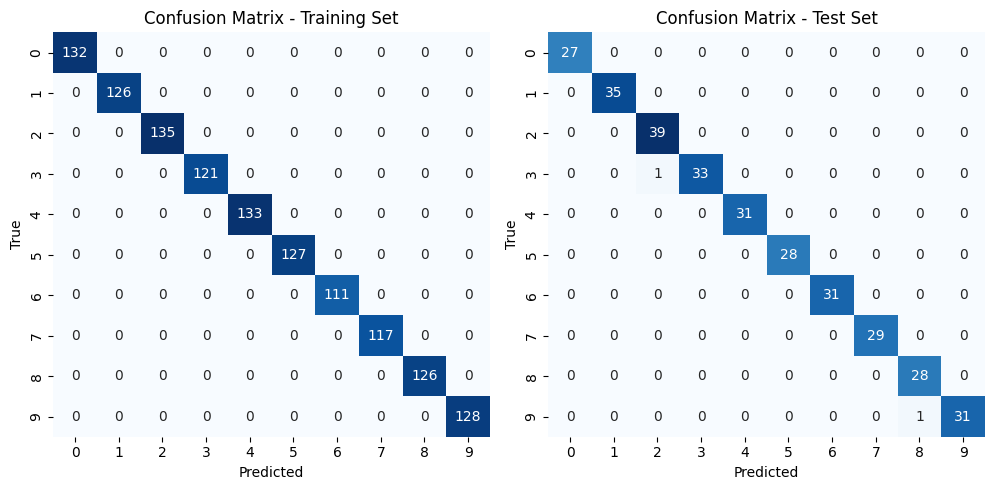

Deployment Duration: 0:00:26.864786


In [140]:
# Predictions
y_pred_train = final_model.predict(X_train)
y_pred_test = final_model.predict(X_test)

print("Classification Report - Training Set:")
print(classification_report(y_train, y_pred_train))

print("Classification Report - Test Set:")
print(classification_report(y_test, y_pred_test))

conf_matrix_train = confusion_matrix(y_train, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Training Set")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.tight_layout()
plt.savefig('C-Matrix.svg', format='svg')
plt.show()

end_time = datetime.now()
print('Deployment Duration: {}'.format(end_time - start_time))